## Causes of Error
Now that we have covered some basic metrics for measuring model performance, let us turn our attention to reasons why models exhibit errors in the first place.<br/>
In model prediction there are two main sources of errors that a model can suffer from.


### Bias
**Bias** due to a model being unable to represent the complexity of the underlying data. A high Bias model is said to **underfit** the data.

### Variance
**Variance** due to a model being overly sensitive to the limited data it has been trained on. A high Variance model is said to **overfit** the data.

## Error due to Bias - Accuracy and Underfitting
Bias occurs when a model has enough data but is **not complex enough to capture the underlying relationships.** As a result, the model consistently and systematically misrepresents the data, leading to low accuracy in prediction. This is known as underfitting. Simply put, bias occurs when we have an inadequate model </br>

### Example 1
An example might be when we have objects that are classified by color and shape, for example easter eggs, but our model can only partition and classify objects by color. It would therefore consistently mislabel future objects--for example labeling rainbows as easter eggs because they are colorful.</br>

### Example 2
Another example would be continuous data that is polynomial in nature, with a model that can only represent linear relationships. In this case it does not matter how much data we feed the model because it cannot represent the underlying relationship. To overcome error from bias, we need a more complex model.

## Error due to Variance - Precision and Overfitting
When training a model, we typically use a limited number of samples from a larger population. If we repeatedly train a model with randomly selected subsets of data, we would expect its predictons to be different based on the specific examples given to it. Here variance is a measure of how much the predictions vary for any given test sample. </br>

Some variance is normal, but too much variance indicates that the model is unable to generalize its predictions to the larger population. High sensitivity to the training set is also known as overfitting, and generally occurs when either the model is too complex or when we do not have enough data to support it. </br>

We can typically reduce the variability of a model's predictions and increase precision by training on more data. If more data is unavailable, we can also control variance by limiting our model's complexity. </br>

## Learning Curve
Now that you have understood the Bias and Variance concepts let us learn about ways we can identify when our model performs well. The Learning Curve functionality from sklearn can help us in this respect. It allows us to study the behavior of our model with respect to the number of data points being considered to understand if our model is performing well or not. </br>
To start with , we have to import the module:
</br>
`from sklearn.learning_curve import learning_curve # sklearn 0.17'
'from sklearn.model_selection import learning_curve # sklearn 0.18`

</br>From the documentation, a reasonable implementation of the function would be as follows:
</br></br>
</br>

`learning_curve(`</br></br>


`       estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)`

</br>Here, `estimator` is the model which we are using to make our predictions with, for example it could be defined as `GaussianNB()`, X and y are the features and label respectively, cv is the cross validation generator, for example `KFold(), n_jobs` is the parameter that decides if we want to run multiple operations in parallel and `train_sizes` is the number of training examples that will be considered to generate the curve.</br>
In the following quiz, you will define your learning curve for a model that we have designed for you and you will observe the results.

## Noisy Data, Complex Model


Regressor score: 1.0000


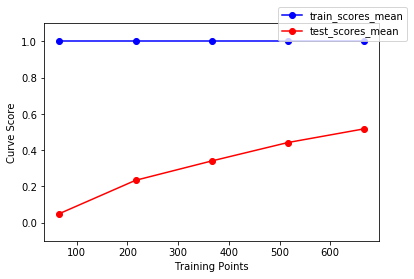

In [31]:
# In this exercise we'll examine a learner which has high variance, and tries to learn
# nonexistant patterns in the data.
# Use the learning curve function from sklearn.learning_curve to plot learning curves
# of both training and testing error.
# CODE YOU HAVE TO TYPE IN IS IN LINE 35

from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt
# PLEASE NOTE:
# In sklearn 0.18, the import would be from sklearn.model_selection import learning_curve
from sklearn.model_selection import learning_curve # sklearn version 0.17
from sklearn.cross_validation import KFold
from sklearn.metrics import explained_variance_score, make_scorer
import numpy as np

# Set the learning curve parameters; you'll need this for learning_curves
size = 1000
cv = KFold(size,shuffle=True)
score = make_scorer(explained_variance_score)

# Create a series of data that forces a learner to have high variance
X = np.round(np.reshape(np.random.normal(scale=5,size=2*size),(-1,2)),2)
y = np.array([[np.sin(x[0]+np.sin(x[1]))] for x in X])

def plot_curve():
    # Defining our regression algorithm
    reg = DecisionTreeRegressor(random_state = 0)
    # Fit our model using X and y
    reg.fit(X,y)
    print "Regressor score: {:.4f}".format(reg.score(X,y))
    
    # TODO: Use learning_curve imported above to create learning curves for both the
    #       training data and testing data. You'll need reg, X, y, cv and score from above.
    
    train_sizes, train_scores, test_scores = learning_curve(DecisionTreeRegressor(random_state=0),X,y,cv=cv,scoring=score)
    
    # Taking the mean of the test and training scores
    train_scores_mean = np.mean(train_scores,axis=1)
    test_scores_mean = np.mean(test_scores,axis=1)
    
    # Plotting the training curves and the testing curves using train_scores_mean and test_scores_mean 
    plt.plot(train_sizes ,train_scores_mean,'-o',color='b',label="train_scores_mean")
    plt.plot(train_sizes,test_scores_mean ,'-o',color='r',label="test_scores_mean")
    
    # Plot aesthetics
    plt.ylim(-0.1, 1.1)
    plt.ylabel("Curve Score")
    plt.xlabel("Training Points")
    plt.legend(bbox_to_anchor=(1.1, 1.1))
    plt.show()
    
plot_curve()

## Improving the Validity of a Model

There is a trade-off in the value of simplicity or complexity of a model given a fixed set of data. If it is too simple, our model cannot learn about the data and misrepresents the data. However if our model is too complex, we need more data to learn the underlying relationship. Otherwise it is very common for a model to infer relationships that might not actually exist in the data.
</br></br>
</br></br>

The key is to find the sweet spot that minimizes bias and variance by finding the right level of model complexity. Of course with more data any model can improve, and different models may be optimal.
</br></br>

To learn more about bias and variance, we recommend this essay by Scott Fortmann-Roe.
</br></br>

In addition to the subset of data chosen for training, what features you use from a given dataset can also greatly affect the bias and variance of your model.

### Bias, Variance, and Number of Features
https://youtu.be/OurfO1ZR2GU


### Bias, Variance & Number of Features Pt 2
https://youtu.be/1lNAvDubBfI

# Representative Power of a Model

## Curse of Dimensionality

https://youtu.be/QZ0DtNFdDko

## Curse of Dimensionality Two

https://youtu.be/OyPcbeiwps8

# Project 
## Boston Housing Prices 

## Project Overview
In this project, you will apply basic machine learning concepts on data collected for housing prices in the Boston, Massachusetts area to predict the selling price of a new home. You will first explore the data to obtain important features and descriptive statistics about the dataset. Next, you will properly split the data into testing and training subsets, and determine a suitable performance metric for this problem. You will then analyze performance graphs for a learning algorithm with varying parameters and training set sizes. This will enable you to pick the optimal model that best generalizes for unseen data. Finally, you will test this optimal model on a new sample and compare the predicted selling price to your statistics
</br></br></br>
## Project Highlights
This project is designed to get you acquainted to working with datasets in Python and applying basic machine learning techniques using NumPy and Scikit-Learn. Before being expected to use many of the available algorithms in the sklearn library, it will be helpful to first practice analyzing and interpreting the performance of your model.</br></br></br>
Things you will learn by completing this project:
</br>
</br>
</br></br>

How to use NumPy to investigate the latent features of a dataset.

</br>
</br>

How to analyze various learning performance plots for variance and bias.

</br>
</br>

How to determine the best-guess model for predictions from unseen data.

</br>
</br>

How to evaluate a model’s performance on unseen data using previous data.

## Software Requirements

## Description

The Boston housing market is highly competitive, and you want to be the best real estate agent in the area. To compete with your peers, you decide to leverage a few basic machine learning concepts to assist you and a client with finding the best selling price for their home. Luckily, you’ve come across the Boston Housing dataset which contains aggregated data on various features for houses in Greater Boston communities, including the median value of homes for each of those areas. Your task is to build an optimal model based on a statistical analysis with the tools available. This model will then be used to estimate the best selling price for your clients' homes.




### Software and Libraries
This project uses the following software and Python libraries:



Python 2.7

NumPy

pandas

scikit-learn (v0.17)

matplotlib

Jupyter Notebook




If you do not have Python installed yet, it is highly recommended that you install the Anaconda distribution of Python, which already has the above packages and more included. Make sure that you select the Python 2.7 installer and not the Python 3.x installer.